In [ ]:
import importlib
import scraper
import matplotlib.pyplot as plt

importlib.reload(scraper)  # Forces reloading of the scraper module

from scraper import fetch_sold_listings, get_listing_details, debug_pagination, clean_price, categorize_bedrooms, save_table_as_image

In [11]:
# from selenium import webdriver
# from selenium.webdriver.chrome.service import Service
# from webdriver_manager.chrome import ChromeDriverManager

# options = webdriver.ChromeOptions()

# # Automatically match ChromeDriver with installed Chrome version
# driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

# driver.get("https://google.com")  # Test if Chrome opens correctly

# print("Chrome opened successfully!")
# driver.quit()

In [12]:
prices_df = get_listing_details("housesigma_page_1.html")

print(prices_df['Address'][0])
print(prices_df)

Reading html file
623 - 88 Colgate Ave , Toronto - South Riverdale
   Asking Price  Sold Price  \
0      $998,000    $975,000   
1    $2,490,000  $2,498,000   
2      $589,900    $575,000   
3    $1,249,000  $1,250,000   
4      $945,000    $920,000   
5    $1,149,900  $1,150,000   
6      $899,000    $930,000   
7      $669,990    $620,000   
8      $649,000    $625,000   
9    $3,399,000  $3,215,000   
10     $599,900    $570,000   
11     $440,000    $425,000   
12     $685,000    $680,000   
13   $1,188,000  $1,300,000   
14     $999,786  $1,125,000   
15   $1,680,000  $1,680,000   
16     $619,990    $592,500   
17     $794,900    $775,000   
18   $5,355,000  $4,412,000   
19   $3,999,000  $3,401,125   

                                              Address           Unit Type  \
0    623 - 88 Colgate Ave , Toronto - South Riverdale           Condo Apt   
1       19 Dalewood Dr , Richmond Hill - Bayview Hill            Detached   
2   3215 - 21 Iceboat Terr , Toronto - Waterfront 

In [13]:
# Run the scraper
url = "https://housesigma.com/on/sold/map/?status=sold&lat=43.715564&lon=-79.418602&zoom=10&page=1&view=list"

# debug_pagination(url)

sold_data_df = fetch_sold_listings(url, 40)

Opening HouseSigma...
Scraping: https://housesigma.com/on/sold/map/?status=sold&lat=43.715564&lon=-79.418602&zoom=10&page=1&view=list
Reloaded the url, waiting for the page to load
✅ Saved HTML: housesigma_page_1.html

Retrieving data from the page
Reading html file
  Asking Price  Sold Price                                            Address  \
0     $998,000    $975,000   623 - 88 Colgate Ave , Toronto - South Riverdale   
1     $588,000    $560,000  2712 - 185 Roehampton Ave , Toronto - Mount Pl...   
2   $2,490,000  $2,498,000      19 Dalewood Dr , Richmond Hill - Bayview Hill   
3     $589,900    $575,000  3215 - 21 Iceboat Terr , Toronto - Waterfront ...   
4   $1,249,000  $1,250,000                   54 William St , Toronto - Weston   

   Unit Type Bedrooms Bathrooms Postal Code  
0  Condo Apt        2         2      M4M0A6  
1  Condo Apt      1+1         1      M4P0C6  
2   Detached      4+2         6      L4B3C3  
3  Condo Apt      1+1         1      M5V4A9  
4   Detached    

In [19]:
print("Dataframe shape: ", sold_data_df.shape)

print(sold_data_df.head(20))

Dataframe shape:  (800, 7)
    Asking Price  Sold Price  \
0       998000.0    975000.0   
1       588000.0    560000.0   
2      2490000.0   2498000.0   
3       589900.0    575000.0   
4      1249000.0   1250000.0   
5       945000.0    920000.0   
6      1149900.0   1150000.0   
7       899000.0    930000.0   
8       669990.0    620000.0   
9       649000.0    625000.0   
10     3399000.0   3215000.0   
11      599900.0    570000.0   
12      440000.0    425000.0   
13      685000.0    680000.0   
14     1188000.0   1300000.0   
15      999786.0   1125000.0   
16     1680000.0   1680000.0   
17      299999.0    310500.0   
18      749900.0    745000.0   
19      619990.0    592500.0   

                                              Address           Unit Type  \
0    623 - 88 Colgate Ave , Toronto - South Riverdale           Condo Apt   
1   2712 - 185 Roehampton Ave , Toronto - Mount Pl...           Condo Apt   
2       19 Dalewood Dr , Richmond Hill - Bayview Hill            Deta

In [43]:
print(sold_data_df.columns)

# Apply the cleaning function to both columns
price_columns = ["Asking Price", "Sold Price"]
sold_data_df[price_columns] = sold_data_df[price_columns].applymap(clean_price)

category_mapping = {
    "Detached": "Detached",
    "Link": "Detached",
    "Single Family Residence": "Detached",
    "Apartment Unit, Condo/Apt Unit": "Condo Apt",
    "Row/Townhouse": "Freehold Townhouse"
}

sold_data_df["Unit Type"] = sold_data_df["Unit Type"].replace(category_mapping)

# List of Unit Types to exclude
exclude_unit_types = ["Other", "Vacant Land", "Parking Space"]

# Filter the DataFrame to exclude these Unit Types
filtered_sold_data_df = sold_data_df[~sold_data_df["Unit Type"].isin(exclude_unit_types)].reset_index(drop=True)

filtered_sold_data_df["Bedroom Category"] = filtered_sold_data_df["Bedrooms"].apply(categorize_bedrooms)

print(len(filtered_sold_data_df.index))
print(filtered_sold_data_df.head(20))

Index(['Asking Price', 'Sold Price', 'Address', 'Unit Type', 'Bedrooms',
       'Bathrooms', 'Postal Code'],
      dtype='object')
796
    Asking Price  Sold Price  \
0       998000.0    975000.0   
1       588000.0    560000.0   
2      2490000.0   2498000.0   
3       589900.0    575000.0   
4      1249000.0   1250000.0   
5       945000.0    920000.0   
6      1149900.0   1150000.0   
7       899000.0    930000.0   
8       669990.0    620000.0   
9       649000.0    625000.0   
10     3399000.0   3215000.0   
11      599900.0    570000.0   
12      440000.0    425000.0   
13      685000.0    680000.0   
14     1188000.0   1300000.0   
15      999786.0   1125000.0   
16     1680000.0   1680000.0   
17      299999.0    310500.0   
18      749900.0    745000.0   
19      619990.0    592500.0   

                                              Address           Unit Type  \
0    623 - 88 Colgate Ave , Toronto - South Riverdale           Condo Apt   
1   2712 - 185 Roehampton Ave , Toront

C:\Users\USER\AppData\Local\Temp\ipykernel_12404\1174728399.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sold_data_df[price_columns] = sold_data_df[price_columns].applymap(clean_price)


In [44]:
print(filtered_sold_data_df.columns)

# Average asking and sold prices by unit type
avg_prices = (
    filtered_sold_data_df.groupby("Unit Type")
    .agg(
        Asking_Price_Avg=("Asking Price", "mean"),
        Sold_Price_Avg=("Sold Price", "mean"),
        Sold_Price_Median=("Sold Price", "median"),
        Count=("Asking Price", "count")  # Counting the number of observations
    )
    .reset_index()
)

avg_prices = avg_prices.sort_values(by="Count", ascending=False).reset_index(drop=True)

# Format the average prices and counts for better readability
avg_prices["Asking_Price_Avg"] = avg_prices["Asking_Price_Avg"].apply(lambda x: f"${x:,.0f}")
avg_prices["Sold_Price_Avg"] = avg_prices["Sold_Price_Avg"].apply(lambda x: f"${x:,.0f}")
avg_prices["Sold_Price_Median"] = avg_prices["Sold_Price_Median"].apply(lambda x: f"${x:,.0f}")
avg_prices["Count"] = avg_prices["Count"].apply(lambda x: f"{x:,}")

# Display the formatted table
print("\nAverage Asking and Sold Price by Unit Type:\n")
print(avg_prices.to_string(index=False))

# Group by Unit Type and Bedrooms, then calculate average Asking and Sold Prices
avg_prices_with_count = (
    filtered_sold_data_df.groupby(["Unit Type", "Bedroom Category"])
    .agg(
        Count=("Asking Price", "count") ,
        Asking_Price_Avg=("Asking Price", "mean"),
        Sold_Price_Avg=("Sold Price", "mean"),
        Sold_Price_Median=("Sold Price", "median")
    )
    .reset_index()
)

avg_prices_with_count = avg_prices_with_count.sort_values(by="Count", ascending=False).reset_index(drop=True)

# Format the average prices and counts for better readability
avg_prices_with_count["Asking_Price_Avg"] = avg_prices_with_count["Asking_Price_Avg"].apply(lambda x: f"${x:,.0f}")
avg_prices_with_count["Sold_Price_Avg"] = avg_prices_with_count["Sold_Price_Avg"].apply(lambda x: f"${x:,.0f}")
avg_prices_with_count["Sold_Price_Median"] = avg_prices_with_count["Sold_Price_Median"].apply(lambda x: f"${x:,.0f}")
avg_prices_with_count["Count"] = avg_prices_with_count["Count"].apply(lambda x: f"{x:,}")

# Print the results
print("\nAverage Asking and Sold Price by Unit Type and Number of Bedrooms:")
print(avg_prices_with_count)


Index(['Asking Price', 'Sold Price', 'Address', 'Unit Type', 'Bedrooms',
       'Bathrooms', 'Postal Code', 'Bedroom Category'],
      dtype='object')

Average Asking and Sold Price by Unit Type:

         Unit Type Asking_Price_Avg Sold_Price_Avg Sold_Price_Median Count
         Condo Apt         $766,863       $750,869          $610,000   354
          Detached       $1,746,894     $1,738,896        $1,440,000   252
     Semi-Detached       $1,143,569     $1,222,260        $1,125,200    81
   Condo Townhouse         $952,015       $941,124          $872,500    65
Freehold Townhouse       $1,158,153     $1,193,712        $1,150,000    35
         Co-Op Apt         $521,666       $509,167          $466,000     6
           Triplex       $1,575,000     $1,441,864        $1,441,864     2
            Duplex       $2,165,000     $1,945,000        $1,945,000     1

Average Asking and Sold Price by Unit Type and Number of Bedrooms:
             Unit Type Bedroom Category Count Asking_Price_A

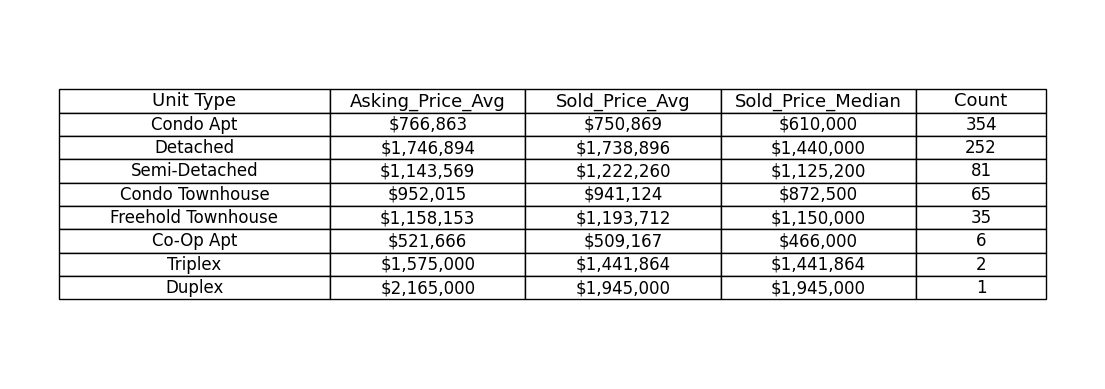

In [49]:
# Adjust the DataFrame to display
df_to_display = avg_prices  # Use your aggregated DataFrame

# Create the figure and axis with larger dimensions
fig, ax = plt.subplots(figsize=(14, len(df_to_display) * 0.6))  # Slightly wider figure
ax.axis('off')  # Hide the axis

# Create the table with improved alignment
table = ax.table(
    cellText=df_to_display.values,
    colLabels=df_to_display.columns,
    loc='center',
    cellLoc='center',        # Center-align cell content
    colLoc='center'          # Center-align column headers
)

# Adjust font size and scale for better fit
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.3, 1.4)  # Slightly increased scaling (width, height)

# Auto-adjust column widths based on content length
col_widths = [0.25, 0.18, 0.18, 0.18, 0.12]  # Adjusted column widths

# Apply column widths
for key, cell in table.get_celld().items():
    cell.set_text_props(ha='center', va='center')  # Center-align text
    if key[0] == 0:  # Header row
        cell.set_fontsize(13)  # Slightly larger font for headers
    if key[1] < len(col_widths):
        cell.set_width(col_widths[key[1]])  # Apply width based on column index

# Save the table as a high-resolution image
plt.savefig("average_prices_table_final.png", bbox_inches='tight', dpi=300)

# Optional: Display the image
plt.show()